#### We are building a Recommendation system to recommend the books
##### There are 4 types of Recommendation system: 1. Popularity based 2. Content based 3. Collaborative filtering based 4.Hybrid recommender system

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle


###### Data upload

In [2]:
user = pd.read_csv("Users.csv")

In [3]:
rating = pd.read_csv("Ratings.csv")

In [4]:
books = pd.read_csv("Books.csv", low_memory=False)

###### Dataset exploration

In [5]:
#checking rows of the user Dataset
user.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
##checking rows of the rating Dataset
#rating.head(5)
rating.tail().sort_values(by=['Book-Rating'],ascending=False)

,User-ID,ISBN,Book-Rating
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149775,276704,1563526298,9
1149779,276723,05162443314,8
1149776,276706,0679447156,0


In [7]:
#checking rows of the books Dataset
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
# checking dimention of the datasets
print(user.shape)
print(rating.shape)
print(books.shape)

(278858, 3)
(1149780, 3)
(271360, 8)


#### EDA

In [9]:
# checking the data type of the columns
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
# Lets rename few columns in the dataset
rating = rating.rename(columns={"Book-Rating":"rating","User-ID":"user_id"})

In [13]:
books = books.rename(columns={"Book-Title":"title","Book-Author":"author", "Year-Of-Publication": "year_of_pub","Publisher":"publisher"})

In [14]:
user = user.rename(columns={"User-ID":"user_id"})

In [15]:
#checking the coluns name
print(rating.columns)
print(books.columns)
print(user.columns)

Index(['user_id', 'ISBN', 'rating'], dtype='object')
Index(['ISBN', 'title', 'author', 'year_of_pub', 'publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['user_id', 'Location', 'Age'], dtype='object')


In [16]:
#checking the Null/Na values
user.isna().sum()

user_id          0
Location         0
Age         110762
dtype: int64

In [17]:
rating.isna().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

In [18]:
books.isna().sum()

ISBN           0
title          0
author         1
year_of_pub    0
publisher      2
Image-URL-S    0
Image-URL-M    0
Image-URL-L    3
dtype: int64

In [19]:
#Lets check the duplicates in the datset
print(user.duplicated().sum())
print(books.duplicated().sum())
print(rating.duplicated().sum())

0
0
0


In [20]:
# Since the % of Null value in User is high in Age column which not a necessary column right now, so we will leave that column as it is.
# NUll value % in books is very low so we can remove the null values.
books[books.isnull().any(axis=1)]

,ISBN,title,author,year_of_pub,publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [21]:
# dropping all the null values permanently
books.dropna(inplace=True)

In [22]:
books.isna().sum()

ISBN           0
title          0
author         0
year_of_pub    0
publisher      0
Image-URL-S    0
Image-URL-M    0
Image-URL-L    0
dtype: int64

In [23]:
# finding unique authors for the books 
len(books['author'].unique())

102020

In [24]:
# finding unique book titles in our data 
len(books['title'].unique())

242130

In [25]:
#finding unique publishers in our data
len(books['publisher'].unique())

16803

In [26]:
# Lets check the Authors with highest number of books published 
books['author'].value_counts().head()

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Name: author, dtype: int64

In [27]:
import seaborn as sns

Text(0.5, 1.0, 'Book-Author')

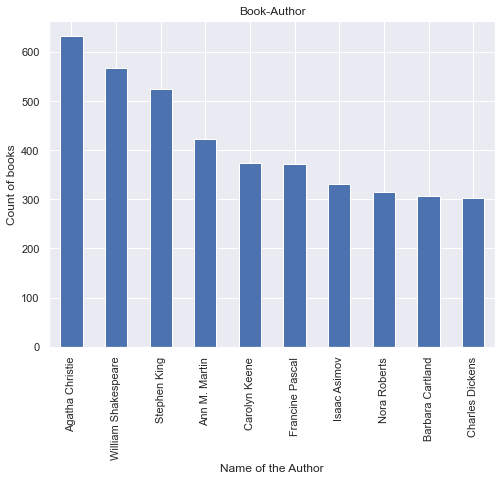

In [28]:
#lets plot the data 
sns.set(font_scale=1.0)
books['author'].value_counts()[:10].plot(kind='bar',figsize=(8,6),
                                        xlabel="Name of the Author",
                                        ylabel="Count of books")
plt.title("Book-Author")

In [29]:
# Lets check the top books published maximum times 
books['title'].value_counts().head()

Selected Poems       27
Little Women         24
Wuthering Heights    21
The Secret Garden    20
Dracula              20
Name: title, dtype: int64

Text(0.5, 1.0, 'Book published Maximum times')

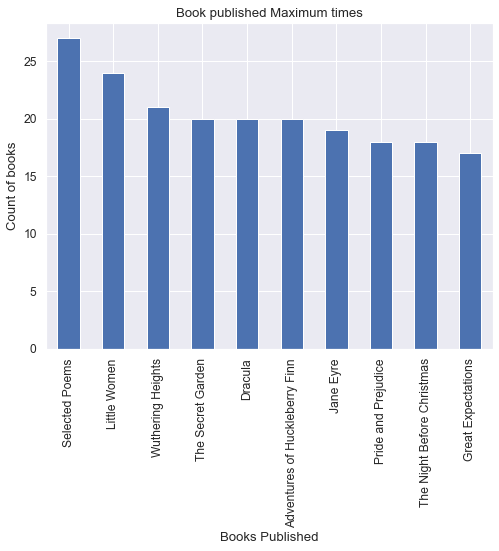

In [30]:
sns.set(font_scale=1.1)
books['title'].value_counts()[:10].plot(kind='bar',figsize=(8,6),
                                       xlabel="Books Published",
                                       ylabel="Count of books")
plt.title("Book published Maximum times")

In [31]:
## Top 5 publication year that has seen maximum publications
books['year_of_pub'].value_counts().head()

2002    17626
1999    17431
2001    17358
2000    17232
1998    15766
Name: year_of_pub, dtype: int64

Text(0.5, 1.0, 'Top 5 publications')

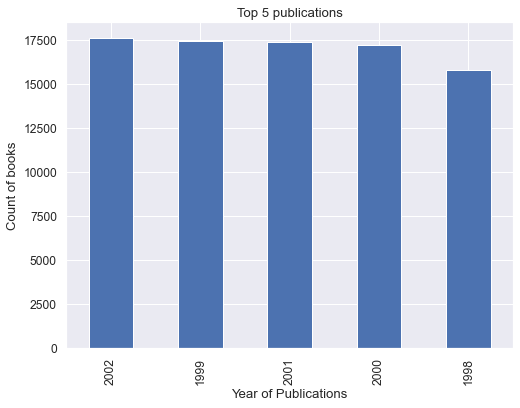

In [32]:
sns.set(font_scale=1.1)
books['year_of_pub'].value_counts()[:5].plot(kind='bar',figsize=(8,6),
                                       xlabel="Year of Publications",
                                       ylabel="Count of books")
plt.title("Top 5 publications")

In [33]:
# Top 5 Publishers with maximum books being puublished
books["publisher"].value_counts().head()

Harlequin           7535
Silhouette          4220
Pocket              3905
Ballantine Books    3783
Bantam Books        3646
Name: publisher, dtype: int64

Text(0.5, 1.0, 'Top 5 publishers')

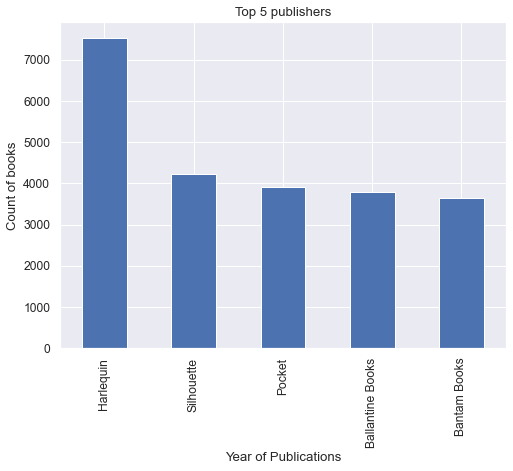

In [34]:
sns.set(font_scale=1.1)
books['publisher'].value_counts()[:5].plot(kind='bar',figsize=(8,6),
                                       xlabel="Year of Publications",
                                       ylabel="Count of books")
plt.title("Top 5 publishers")

##### Modelling the data for Recommendation system Model building (Popularity based)

In [35]:
#Here we are displaying highest average rating...the top 50 higest rating books which has minimum of 250 ratings
# We are going to merge ratings and books dataset on 'ISBN' number 

books_with_ratings = rating.merge(books, on="ISBN")
books_with_ratings.head(5)

,user_id,ISBN,rating,title,author,year_of_pub,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [36]:
book_title_and_rating_only = books_with_ratings.groupby('title').count()['rating'].reset_index()

In [37]:
book_title_and_rating_only.rename(columns={'rating': 'num_rating'},inplace=True)
book_title_and_rating_only

,title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241061,Ã?Â?lpiraten.,2
241062,Ã?Â?rger mit Produkt X. Roman.,4
241063,Ã?Â?sterlich leben.,1
241064,Ã?Â?stlich der Berge.,3


In [38]:
book_title_and_rating_only.describe()

,num_rating
count,241066.000000
mean,4.277372
std,16.738847
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,2502.000000


In [39]:
book_title_and_avg_rating_only = books_with_ratings.groupby('title').mean()['rating'].reset_index()
book_title_and_avg_rating_only.rename(columns={'rating':'avg_rating'}, inplace=True)
book_title_and_avg_rating_only

,title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241061,Ã?Â?lpiraten.,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,5.250000
241063,Ã?Â?sterlich leben.,7.000000
241064,Ã?Â?stlich der Berge.,2.666667


In [40]:
book_title_and_avg_rating_only.describe()

,avg_rating
count,241066.000000
mean,2.890110
std,3.268966
min,0.000000
25%,0.000000
50%,1.971429
75%,5.000000
max,10.000000


In [41]:
popular_books = book_title_and_rating_only.merge(book_title_and_avg_rating_only, on='title')
popular_books

,title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241061,Ã?Â?lpiraten.,2,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241063,Ã?Â?sterlich leben.,1,7.000000
241064,Ã?Â?stlich der Berge.,3,2.666667


In [42]:
top_50_books = popular_books[popular_books['num_rating'] >= 250].sort_values('avg_rating', ascending=False).head(50)
top_50_books.head()

,title,num_rating,avg_rating
80432,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80439,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [43]:
top_50_books = top_50_books.merge(books, on='title')
top_50_books.shape

(196, 10)

In [44]:
top_50_books.head(3)

,title,num_rating,avg_rating,ISBN,author,year_of_pub,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...


In [45]:
top_50_books.drop(['ISBN', 'Image-URL-S', 'Image-URL-L', 'publisher'], axis = 1, inplace=True)

In [46]:
top_50_books


,title,num_rating,avg_rating,author,year_of_pub,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,J. K. Rowling,2001,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,J. K. Rowling,2000,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,J. K. Rowling,2002,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...,...
191,Lord of the Flies,259,3.818533,William G. Golding,1978,http://images.amazon.com/images/P/0698102193.0...
192,A Prayer for Owen Meany,413,3.796610,John Irving,1990,http://images.amazon.com/images/P/0345361792.0...
193,A Prayer for Owen Meany,413,3.796610,John Irving,1989,http://images.amazon.com/images/P/0345363523.0...
194,"The Vampire Lestat (Vampire Chronicles, Book II)",301,3.777409,ANNE RICE,1986,http://images.amazon.com/images/P/0345313860.0...


In [47]:
top_50_books['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

#### Collaborative Book Recommendation System

In [48]:
books_with_ratings.shape

(1031129, 10)

In [49]:
books_with_ratings.sample(5)

,user_id,ISBN,rating,title,author,year_of_pub,publisher,Image-URL-S,Image-URL-M,Image-URL-L
649114,30487,0671013882,8,The FAMILY MARKOWITZ,Allegra Goodman,1997,Washington Square Press,http://images.amazon.com/images/P/0671013882.0...,http://images.amazon.com/images/P/0671013882.0...,http://images.amazon.com/images/P/0671013882.0...
4329,193898,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...
799165,114368,0758204280,5,Bad Boys on Board,Lori Foster,2003,BRAVA,http://images.amazon.com/images/P/0758204280.0...,http://images.amazon.com/images/P/0758204280.0...,http://images.amazon.com/images/P/0758204280.0...
295400,125039,0380725622,0,The Barn (Avon Camelot Books (Paperback)),Avi,1996,HarperTrophy,http://images.amazon.com/images/P/0380725622.0...,http://images.amazon.com/images/P/0380725622.0...,http://images.amazon.com/images/P/0380725622.0...
276140,31659,0140296409,6,Disgrace,J. M. Coetzee,2000,Penguin Books,http://images.amazon.com/images/P/0140296409.0...,http://images.amazon.com/images/P/0140296409.0...,http://images.amazon.com/images/P/0140296409.0...


In [50]:
books_with_ratings.groupby('user_id').count()

,ISBN,rating,title,author,year_of_pub,publisher,Image-URL-S,Image-URL-M,Image-URL-L
user_id,,,,,,,,,
2,1,1,1,1,1,1,1,1,1
8,17,17,17,17,17,17,17,17,17
9,3,3,3,3,3,3,3,3,3
10,1,1,1,1,1,1,1,1,1
12,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
278846,1,1,1,1,1,1,1,1,1
278849,4,4,4,4,4,4,4,4,4
278851,23,23,23,23,23,23,23,23,23


In [51]:
# we are selecting users who have rated more than 200 books
rating_users = books_with_ratings.groupby('user_id').count()['rating']>200

In [52]:
rating_users = rating_users[rating_users].index
rating_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='user_id', length=811)

In [53]:
#filtering based on user
filtered_rating = books_with_ratings[books_with_ratings['user_id'].isin(rating_users)]

In [54]:
filtered_rating.head()

,user_id,ISBN,rating,title,author,year_of_pub,publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [55]:
#filtering based on books
famous_books = filtered_rating.groupby('title').count()['rating']>=50

In [56]:
famous_books = famous_books[famous_books].index

In [57]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=706)

In [58]:
#we are going to filter now 
final_rating = filtered_rating[filtered_rating['title'].isin(famous_books)]

In [59]:
#We will drop the duplicates in final_rating df, if it has any as books name is repeated
final_rating.drop_duplicates()
final_rating

,user_id,ISBN,rating,title,author,year_of_pub,publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026717,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027916,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028770,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029063,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [60]:
final_rating.shape

(58586, 10)

In [63]:
pivot_df = final_rating.pivot_table(index ='title', columns='user_id', values='rating')

In [64]:
pivot_df.fillna(0, inplace=True)

In [65]:
pivot_df

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cosine Similarity

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
similarity_score = cosine_similarity(pivot_df)
similarity_score

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [68]:
similarity_score[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [69]:
similarity_score.shape

(706, 706)

#### Making the recommendation function :
###### This function wil take a name of a book and suggest 5 books based on cosine similarity

In [70]:
#np.where(pivot_df.index=='1984')[0][0]
#np.where(pivot_df.index=='Zoya')[0][0]


#similarity_score[0] #we need to find top 6 books as highest score(1 st index would be book itself)
#distances= similarity_score[index] #this would give similar score book indices
#list(enumerate(similarity_score[0])) #enumearte to see distance and the index
#sorted(list(enumerate(similarity_score[0])), key = lambda x: x[1])  #sorted on basis of second column 
#sorted(list(enumerate(similarity_score[0])), key = lambda x: x[1], reverse=True) # sorted in desending order
sorted(list(enumerate(similarity_score[0])), key = lambda x: x[1], reverse=True)[1:6] #taking top 5 excluding top index which is book itself

[(47, 0.2702651417103732),
 (545, 0.2639619371123497),
 (82, 0.23669374347400993),
 (634, 0.23299389358170394),
 (551, 0.2262639743141286)]

In [71]:
def recommend(book_name):
    #fetch index
    index = np.where(pivot_df.index== book_name)[0][0] #this will help us to find index of the book from the book name
    #distances= similarity_score[index] #this would give similar score book indices 
    similar_items = sorted(list(enumerate(similarity_score[index])), key = lambda x: x[1], reverse=True)[1:6]
    
    for i in similar_items:
        print(pivot_df.index[i[0]]) #this will give the name of the book from the index
#    return suggestion

In [72]:
recommend('1984') # testing the function

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [98]:
# building the function which wil return name and image of the suggested books
def recommend(book_name):
    # index fetch
    index = np.where(pivot_df.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['title'] == pivot_df.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['author'].values))
        item.extend(list(temp_df.drop_duplicates('title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [190]:
# building the function which wil return name and image of the suggested books
def recommend(book_name):
    # index fetch
    index = np.where(pivot_df.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['title'] == pivot_df.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['author'].values))
        item.extend(list(temp_df.drop_duplicates('title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [191]:
recommend('Echoes')

[['The Glass Lake',
  'Maeve Binchy',
  'http://images.amazon.com/images/P/0440221595.01.MZZZZZZZ.jpg'],
 ["Angela's Ashes (MMP) : A Memoir",
  'Frank McCourt',
  'http://images.amazon.com/images/P/0684872153.01.MZZZZZZZ.jpg'],
 ['The Return Journey',
  'MAEVE BINCHY',
  'http://images.amazon.com/images/P/0440224594.01.MZZZZZZZ.jpg'],
 ['Harvest',
  'BELVA PLAIN',
  'http://images.amazon.com/images/P/0440208912.01.MZZZZZZZ.jpg'],
 ['The Copper Beech',
  'Maeve Binchy',
  'http://images.amazon.com/images/P/0440213290.01.MZZZZZZZ.jpg']]

In [99]:
#recommend('Zoya') # testing the function\
recommend('Echoes')

[['The Glass Lake',
  'Maeve Binchy',
  'http://images.amazon.com/images/P/0440221595.01.MZZZZZZZ.jpg'],
 ["Angela's Ashes (MMP) : A Memoir",
  'Frank McCourt',
  'http://images.amazon.com/images/P/0684872153.01.MZZZZZZZ.jpg'],
 ['The Return Journey',
  'MAEVE BINCHY',
  'http://images.amazon.com/images/P/0440224594.01.MZZZZZZZ.jpg'],
 ['Harvest',
  'BELVA PLAIN',
  'http://images.amazon.com/images/P/0440208912.01.MZZZZZZZ.jpg'],
 ['The Copper Beech',
  'Maeve Binchy',
  'http://images.amazon.com/images/P/0440213290.01.MZZZZZZZ.jpg']]

In [106]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [104]:
pivot_df.index[545]

"The Handmaid's Tale"

In [78]:
#books.drop_duplicates('title')

##### Pickled files

In [77]:
#Pickling all the data files 
pickle.dump(top_50_books,open('top_50_popular_books.pkl','wb'))

In [62]:
pickle.dump(final_rating,open('final_rating_data.pkl','wb'))

In [112]:
books_data_new = books.copy()

In [114]:
#books_data_new is the copied books file which has no duplicate and 'NA'/'NUll' values
pickle.dump(books_data_new,open('books_data_new','wb'))

In [79]:
pickle.dump(pivot_df,open('pivot_df.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_score,open('similarity_score.pkl','wb'))

##### Recommender Model

In [166]:
def recommend(book_name):
    # index fetch
    index = np.where(pivot_df.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['title'] == pivot_df.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        #item.extend(list(temp_df.drop_duplicates('title')['author'].values))
        item.extend(list(temp_df.drop_duplicates('title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [167]:
recommend('1984')

[['Animal Farm',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [168]:
recommend('Falling Angels')

[['The Stone Diaries',
  'http://images.amazon.com/images/P/014023313X.01.MZZZZZZZ.jpg'],
 ['Girl with a Pearl Earring',
  'http://images.amazon.com/images/P/0452282152.01.MZZZZZZZ.jpg'],
 ['Echoes', 'http://images.amazon.com/images/P/0440122090.01.MZZZZZZZ.jpg'],
 ['The Shipping News : A Novel',
  'http://images.amazon.com/images/P/0743225406.01.MZZZZZZZ.jpg'],
 ['Dragonfly in Amber',
  'http://images.amazon.com/images/P/0440215625.01.MZZZZZZZ.jpg']]

##### Streamlit code to populate similar books with images

In [169]:
print(recommend('1984')[0][0])
print(recommend('1984')[0][1])
print(recommend('1984')[1][0])
print(recommend('1984')[1][1])
print(recommend('1984')[2][0])
print(recommend('1984')[2][1])
print(recommend('1984')[3][0])
print(recommend('1984')[3][1])
print(recommend('1984')[4][0])
print(recommend('1984')[4][1])

Animal Farm
http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg
The Handmaid's Tale
http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg
Brave New World
http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg
The Vampire Lestat (Vampire Chronicles, Book II)
http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg
The Hours : A Novel
http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg


In [165]:
print(recommend('1984')[0])
print(recommend('1984')[1])

['Animal Farm', 'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg']
["The Handmaid's Tale", 'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg']


In [ ]:
 if st.button('Recommend'):
        recommended_book_names = recommend(Book_selected)
        col1,col2,col3 = st.columns(3)
        with col1:
            st.text(recommended_book_names[0][0])
            st.image(images[recommended_book_names[0][0]])
        with col2:
            st.text(recommended_book_names[0][1])
            st.image(images[recommended_book_names[0][1]])
        with col3:
            st.text(recommended_book_names[0][2])
            st.image(images[recommended_book_names[0][2]])

In [170]:
recommended_book_names = recommend('1984')

In [181]:
print(recommended_book_names[3][0])
print(recommended_book_names[3][1])

The Vampire Lestat (Vampire Chronicles, Book II)
http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg


In [184]:
 index = np.where(pivot_df.index==Book_name)[0][0]

NameError: name 'Book_name' is not defined

In [195]:
recommend('Grave Undertaking')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [196]:
recommend('Midnight')

[['Winter Moon',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0553582933.01.MZZZZZZZ.jpg'],
 ['Dark Rivers of the Heart',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/034539657X.01.MZZZZZZZ.jpg'],
 ['Shadowfires',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425136981.01.MZZZZZZZ.jpg'],
 ['While My Pretty One Sleeps',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671673688.01.MZZZZZZZ.jpg'],
 ['Before I Say Good-Bye',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671004573.01.MZZZZZZZ.jpg']]